In [ ]:
%matplotlib inline


# Simulating a match

Before we get started, we are going to simulate a football match
using a very simple model. One in which goals occur completely at random
during the match.


In [1]:
import numpy as np
import numpy.random as rnd
import time
import pylab as plt

## Setting parameters
Lets set up the basic scoring rates for football



In [2]:
#Length of match
match_minutes = 90
#Average goals per match
goals_per_match = 2.79
#Probability of a goal per minute
prob_per_minute = np.array(goals_per_match/match_minutes)
print('The probability of a goal per minute is %5.5f. \n' % prob_per_minute )

The probability of a goal per minute is 0.03100. 



## Simulating a single game
Now we simulate a single game. Goals go in with the same probability every minute.
Run the simulation below 10 times. How many times were there 3 goals in a match?




In [10]:
#Count of the number of goals
goals=0

for minute in range(match_minutes):

  #Generate a random number between 0 and 1.
  r=rnd.rand(1,1)

  #Prints an X when there is a goal and a zero otherwise.
  if (r < prob_per_minute):
    #Goal - if the random number is less than the goal probability.
    print('X', end = ' ')
    goals=goals+1
    time.sleep(1)  #Longer pause
  else:
    print('o', end = ' ')
    time.sleep(0.1)  #Short pause
print('\n')
print('Final whistle. \n \nThere were ' + str(goals) + ' goals.')

o o o o o o o o o o o o o o o o o o o X o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o X o o o X o o o o o o o o o o o o X o o o o o o o o o o o o X o o o o o o o 

Final whistle. 
 
There were 5 goals.


It is likely that about 2 or 3 of your simulations ended with 3 goals.
Most matches have between 0 and 5 goals. It is likely you saw at most one match with 0 goals.



## Simulating goals over a season



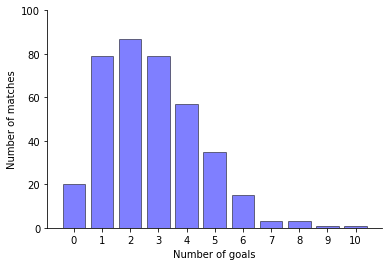

In [17]:
#  We now simulate 380 matches of a football season and look at how well it predicts the 
#  distribution of the number of goals. This is done in the code below: we loop over 380 matches,
#  store the number of goals for each match in array and then we make a histogram of the number of goals.
#


def simulateMatch(n, p):
  # n - number of time units
  # p - probability per time unit of a goal
  # display_match == True then display simulation output for match.

  # Count the number of goals
  goals = 0

  for minute in range(n):
      # Generate a random number between 0 and 1.
      r = rnd.rand(1, 1)
      # Prints an X when there is a goal and a zero otherwise.
      if (r < p):
        # Goal - if the random number is less than the goal probability.
        goals = goals + 1

  return goals

# Number of matches
num_matches = 380

# Loop over all the matches and print the number of goals.
goals = np.zeros(num_matches)
for i in range(num_matches):
  goals[i] = simulateMatch(match_minutes, prob_per_minute)
  #print('In match ' + str(i+1) + ' there were ' + str(int(goals[i])) + ' goals.')

# Create a histogram

fig, ax = plt.subplots(num=1)

histogram_range = np.arange(-0.5, 10.51, 1)
histogram_goals = np.histogram(goals, histogram_range)

ax.bar(histogram_goals[1][:-1] + 0.5, histogram_goals[0], color='blue', edgecolor='black', linestyle='-', alpha=0.5)
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0, 11, step=1))
ax.set_yticks(np.arange(0, 101, step=20))
ax.set_xlabel('Number of goals')
ax.set_ylabel('Number of matches')
plt.show()

Run the code a few times and look at the resulting histogram.
Now we have seen this simulation, we can look at football...
